### 数据读取

In [1]:
import pandas as pd

# Reading data from web
data_url = "https://raw.githubusercontent.com/alstat/Analysis-with-Programming/master/2014/Python/Numerical-Descriptions-of-the-Data/data.csv"
df = pd.read_csv(data_url)

### 查看数据情况
读取数据后，我们首先要对数据有一个基本了解。

In [2]:
# 查看数据的前4行和后5行。
print(df.head(n=4))
print(df.tail(n=5))

# 查看数据的索引和列名。
print(df.index)
print(df.columns,'\n')

# 查看数据的统计。
print(df.describe())

    Abra  Apayao  Benguet  Ifugao  Kalinga
0   1243    2934      148    3300    10553
1   4158    9235     4287    8063    35257
2   1787    1922     1955    1074     4544
3  17152   14501     3536   19607    31687
     Abra  Apayao  Benguet  Ifugao  Kalinga
74   2505   20878     3519   19737    16513
75  60303   40065     7062   19422    61808
76   6311    6756     3561   15910    23349
77  13345   38902     2583   11096    68663
78   2623   18264     3745   16787    16900
RangeIndex(start=0, stop=79, step=1)
Index(['Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga'], dtype='object') 

               Abra        Apayao      Benguet        Ifugao       Kalinga
count     79.000000     79.000000    79.000000     79.000000     79.000000
mean   12874.379747  16860.645570  3237.392405  12414.620253  30446.417722
std    16746.466945  15448.153794  1588.536429   5034.282019  22245.707692
min      927.000000    401.000000   148.000000   1074.000000   2346.000000
25%     1524.000000   3435.500000

### 数据提取与丢弃
了解数据整体结构后，我们希望提取特定的数据，或者丢弃某些暂时不需要的数据。

In [3]:
# 提取11-20行，前三列的数据。
print(df.iloc[10:20, 0:3],'\n')

#专门提取某一个数据，这个例子提取的是第三行，第二列数据（默认从0开始算哈）
print(df.iat[3,2],'\n')

# 丢弃第二列数据。
print(df.drop(df.columns[[1]], axis = 1).head(),'\n')

# 丢弃第二行数据。
print(df.drop(df.index[[1]], axis = 0).head(),'\n')

print(df.shape,'\n') #打印维度

# 我们要筛选出 Abra 大于 30000 的数据
print(df[df.Abra>30000].shape,'\n')

# 我们要筛选出 Abra 大于 30000 的数据 或 Apayao 大于 10000
print(df[(df.Abra>30000)|(df.Apayao>10000)].shape,'\n')

#假如加入了筛选条件后，我们只关心 Benguet
df[['Benguet']][(df.Abra>30000)|(df.Apayao>10000)].head()

     Abra  Apayao  Benguet
10    981    1311     2560
11  27366   15093     3039
12   1100    1701     2382
13   7212   11001     1088
14   1048    1427     2847
15  25679   15661     2942
16   1055    2191     2119
17   5437    6461      734
18   1029    1183     2302
19  23710   12222     2598 

3536 

    Abra  Benguet  Ifugao  Kalinga
0   1243      148    3300    10553
1   4158     4287    8063    35257
2   1787     1955    1074     4544
3  17152     3536   19607    31687
4   1266     2530    3315     8520 

    Abra  Apayao  Benguet  Ifugao  Kalinga
0   1243    2934      148    3300    10553
2   1787    1922     1955    1074     4544
3  17152   14501     3536   19607    31687
4   1266    2385     2530    3315     8520
5   5576    7452      771   13134    28252 

(79, 5) 

(14, 5) 

(41, 5) 



,Benguet
3,3536
7,2463
9,1064
11,3039
13,1088


### 数据整理

In [4]:
### 按 Abra 列升序排序
print(df.sort_values(by='Abra').head(), '\n')
print(df.sort_values(by='Abra').tail(), '\n')

############################################## 缺失值处理

# 1.填充缺失值
print(df.fillna(1111111111111).head(),'\n')  #以数字代替缺失值
print(df.fillna('YuJie2333333333333').head(),'\n') #用字符串代替缺失值
print(df.fillna(method='pad').head(),'\n') #用前一个数据代替缺失值
print(df.fillna(method='bfill').head(),'\n') #用后一个数据代替缺失值

# 2.删除缺失值
print(df.dropna(axis=0).head(),'\n') #删除缺失行
print(df.dropna(axis=1).head(),'\n') #删除缺失列

# 3.插值法填补缺失值
# 由于没有数据，这儿插播一个小知识点：创建一个随机的数据框
import numpy as np
# 创建一个6*4的数据框，randn函数用于创建随机数
czf_data = pd.DataFrame(np.random.randn(6,4),columns=list('ABCD'))
print(czf_data,'\n')

# 把第二行数据设置为缺失值
czf_data.iloc[2,:]=np.nan
print(czf_data,'\n')

# 接着就可以利用插值法填补空缺值了~
print(czf_data.interpolate(),'\n')

########################################### 值替换

#首先创造一个Series（没有数据情况下的福音233）
Series = pd.Series([0,1,2,3,4,5])

#数值替换，例如将0换成10000000000000
print(Series.replace(0,10000000000000),'\n')

print(Series.replace([0,1,2,3,4,5],[11111,222222,3333333,44444,55555,666666]),'\n')



    Abra  Apayao  Benguet  Ifugao  Kalinga
6    927    1099     2796    5134     3106
10   981    1311     2560    5078     3466
18  1029    1183     2302    6438     3316
8   1039    1382     2592    6842     4973
14  1048    1427     2847    5526     4402 

     Abra  Apayao  Benguet  Ifugao  Kalinga
67  57282   38692     6143   18634    46985
55  57488   54625     6045   21031    64122
71  59094   35126     5987   18940    52437
59  59516   39525     8813   20596    64034
75  60303   40065     7062   19422    61808 

    Abra  Apayao  Benguet  Ifugao  Kalinga
0   1243    2934      148    3300    10553
1   4158    9235     4287    8063    35257
2   1787    1922     1955    1074     4544
3  17152   14501     3536   19607    31687
4   1266    2385     2530    3315     8520 

    Abra  Apayao  Benguet  Ifugao  Kalinga
0   1243    2934      148    3300    10553
1   4158    9235     4287    8063    35257
2   1787    1922     1955    1074     4544
3  17152   14501     3536   19607    31687

### 统计分析

#### T检验
假设检验：我们假设总体数据的某项特征，验证该样本是否能支持我们的假设。

T检验的统计值是样本均值与总体均值相差多少标准差，p值表现样本均值对总体均值的支持度。p值越小，越有理由拒绝原假设。默认p值为双侧p值。

In [5]:
import scipy.stats as ss
 
# Perform one sample t-test using 1500 as the true mean
print(ss.ttest_1samp(a = df.ix[:, 'Abra'], popmean = 15000),'\n')
print(ss.ttest_1samp(a = df, popmean = 15000))

Ttest_1sampResult(statistic=-1.1281738488299586, pvalue=0.26270472069109496) 

Ttest_1sampResult(statistic=array([ -1.12817385,   1.07053437, -65.81425599,  -4.564575  ,
         6.17156198]), pvalue=array([2.62704721e-01, 2.87680340e-01, 4.15643528e-70, 1.83764399e-05,
       2.82461897e-08]))


d:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


1.独立样本t检验

两独立样本t检验就是根据样本数据对两个样本来自的两独立总体的均值是否有显著差异进行推断；进行两独立样本t检验的条件是，两样本的总体相互独立且符合正态分布。

In [6]:
import numpy as np
from scipy.stats import ttest_ind

IS_t_test = pd.DataFrame(np.array([[1,1,1,1,1,2,2,2,2,2],[34,37,28,36,30,43,45,47,49,39]]).T,columns = ['group','data'])
Group1 = IS_t_test[IS_t_test['group']==1]['data']
Group2 = IS_t_test[IS_t_test['group']==2]['data']
print(ttest_ind(Group1,Group2))
# 输出结果的第一个元素为t值，第二个元素为p-value
# ttest_ind默认两组数据方差齐性的，如果想要设置默认方差不齐，可以设置equal_var=False

print(ttest_ind(Group1,Group2,equal_var=True))
print(ttest_ind(Group1,Group2,equal_var=False))

Ttest_indResult(statistic=-4.751545139010435, pvalue=0.0014423819408438474)
Ttest_indResult(statistic=-4.751545139010435, pvalue=0.0014423819408438474)
Ttest_indResult(statistic=-4.751545139010435, pvalue=0.0014425608643614844)


2.配对样本t检验

我们暂且假设上边独立样本是配对样本，使用同样的数据

In [7]:
from scipy.stats import ttest_rel
print(ttest_rel(Group1,Group2))

Ttest_relResult(statistic=-5.687367919007336, pvalue=0.00471961872448184)


#### 方差分析

1.单因素方差分析

这里依然沿用t检验的数据

In [8]:
from scipy import stats
w,p = stats.levene(Group1,Group2)
#levene方差齐性检验。levene(*args, **kwds)  Perform Levene test for equal variances.如果p<0.05，则方差不齐
print(w,p)
#进行方差分析
f,p = stats.f_oneway(Group1,Group2)
print(f,p)

0.019607843137254936 0.8920991605586553
22.57718120805367 0.0014423819408438542


2.多因素方差分析

In [9]:
#多因素方差分析
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# formula = 'weight~C(id)+C(nutrient)+C(id):C(nutrient)'
# anova_results = anova_lm(ols(formula,MANOVA).fit())
# prin(anova_results)

3.重复测量设计的方差分析（单因素）   ********待完善

重复测量设计是对同一因变量进行重复测度，重复测量设计的方差分析可以是同一条件下进行的重复测度，也可以是不同条件下的重复测量。

代码和多因素方差分析一样，思路不一样而已~但我还找不到多因素方差分析合适的数据所以这儿就先不写了2333

 4.混合设计的方差分析   ********待完善

#### 卡方检验
卡方检验就是统计样本的实际观测值与理论推断值之间的偏离程度，实际观测值与理论推断值之间的偏离程度就决定卡方值的大小，卡方值越大，越不符合；卡方值越小，偏差越小，越趋于符合，若两个值完全相等时，卡方值就为0，表明理论值完全符合。

1.单因素卡方检验

In [10]:
from scipy import stats
from scipy.stats import chisquare
observed = np.array([15,95])
 #观测值：110学生中化妆的女生95人，化妆的男生15人
expected = np.array([55,55])
#理论值：110学生中化妆的女生55人，化妆的男生55人
chisquare(observed,expected)

Power_divergenceResult(statistic=58.18181818181818, pvalue=2.389775628860044e-14)

2.多因素卡方检验 ********待完善

回归分析  *****待学习： 数据拟合，广义线性回归....等等

### 数据可视化

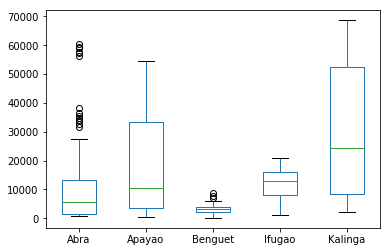

In [11]:
# Import the module for plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.show(df.plot(kind = 'box'))

现在，我们可以用pandas模块中集成R的ggplot主题来美化图表。要使用ggplot，我们只需要在上述代码中多加一行，

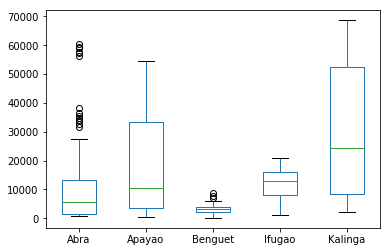

In [12]:
import matplotlib.pyplot as plt

#pd.options.display.mpl_style = 'default' # Sets the plotting display theme to ggplot2
plt.style.use = 'default' # Sets the plotting display theme to ggplot2
df.plot(kind = 'box')

比matplotlib.pyplot主题简洁太多。

#### Seaborn是基于matplotlib的Python可视化库.

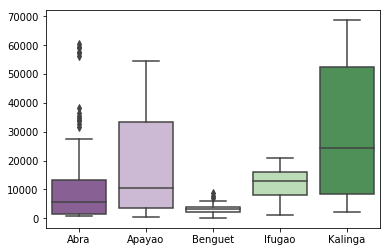

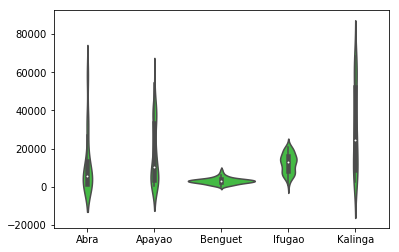

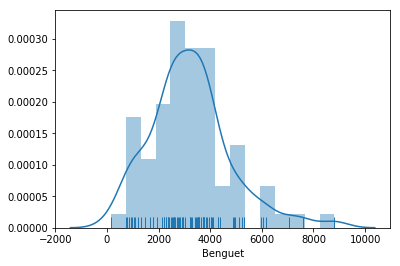

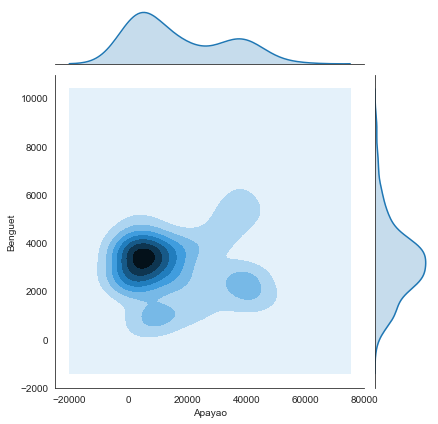

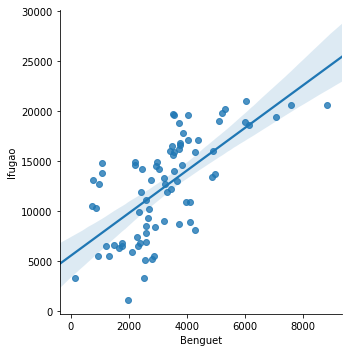

In [13]:
# Import the seaborn library
import seaborn as sns
import matplotlib as mpl
# Do the boxplot
plt.show(sns.boxplot(data = df,  palette= "PRGn"))

plt.show(sns.violinplot(data = df, width = 1, color = "limegreen"))

plt.show(sns.distplot(df.ix[:,2], rug = True, bins = 15))

with sns.axes_style("white"):
    plt.show(sns.jointplot(df.ix[:,1], df.ix[:,2], kind = "kde"))
    
plt.show(sns.lmplot("Benguet", "Ifugao", df))

In [14]:
tips = sns.load_dataset('tips') #从网络环境导入数据tips

1.lmplot函数

lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, size=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None)

功能：Plot data and regression model fits across a FacetGrid. 

下面就不同的例子，对lmplot的参数进行解释

例子1.  画出总账单和小费回归关系图

用到了lmplot(x, y, data,scatter_kws）

x,y,data一目了然这儿就不多解释了，scatter_kws和line_kws的官方解释如下：

{scatter,line}_kws : dictionarie

Additional keyword arguments to pass to plt.scatter and plt.plot.

scatter为点，line为线。其实就是用字典去限定点和线的各种属性，如例子所示，散点的颜色为灰石色，线条的颜色为印度红，成像效果就是这样点线颜色分离，展现效果很好。大家也可以换上自己想要的图片属性。

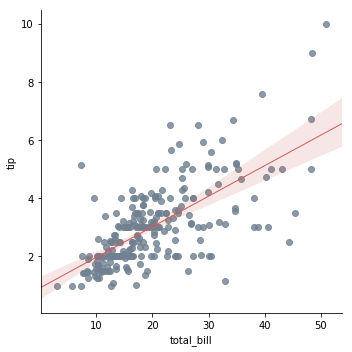

In [15]:
sns.lmplot("total_bill", "tip", tips,
           scatter_kws={"marker": ".", "color": "slategray"},
           line_kws={"linewidth": 1, "color": "indianred"})

另外：颜色还可以使用RGB代码，具体对照表可以参考这个网站，可以自己搭配颜色：

http://www.114la.com/other/rgb.htm

marker也可以有多种样式，具体如下：

.  Point marker

,  Pixel marker

o  Circle marker

v  Triangle down marker 

^  Triangle up marker 

<  Triangle left marker 

\>  Triangle right marker 

1  Tripod down marker

2  Tripod up marker

3  Tripod left marker

4  Tripod right marker

s  Square marker

p  Pentagon marker

\*  Star marker

h  Hexagon marker

H  Rotated hexagon D Diamond marker

d  Thin diamond marker

| Vertical line (vlinesymbol) marker

_  Horizontal line (hline symbol) marker

\+  Plus marker

x  Cross (x) marker

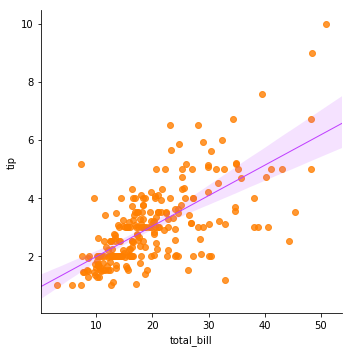

In [16]:
sns.lmplot("total_bill", "tip", tips,
           scatter_kws={"marker": ".","color":"#FF7F00"},
           line_kws={"linewidth": 1, "color": "#BF3EFF"})

官方解释：

x_estimator : callable that maps vector -> scalar, optional

Apply this function to each unique value of x and plot the resulting estimate. This is useful when x is a discrete variable. If x_ci is not None, this estimate will be bootstrapped and a confidence interval will be drawn.

大概解释就是：对拥有相同x水平的y值进行映射

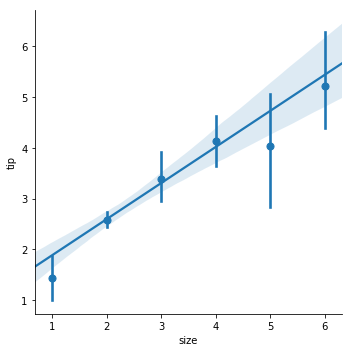

In [17]:
plt.figure()
sns.lmplot('size', 'tip', tips, x_estimator= np.mean)

{x,y}_jitter : floats, optional

Add uniform random noise of this size to either the x or y variables. The noise is added to a copy of the data after fitting the regression, and only influences the look of the scatterplot. This can be helpful when plotting variables that take discrete values.

jitter是个很有意思的参数, 特别是处理靶数据的overlapping过于严重的情况时, 通过增加一定程度的噪声(noise)实现数据的区隔化, 这样原始数据是若干 点簇 变成一系列密集邻近的点群. 另外, 有的人会经常将 rug 与 jitter 结合使用. 这依人吧.对于横轴取离散水平的时候, 用x_jitter可以让数据点发生水平的扰动.但扰动的幅度不宜过大。

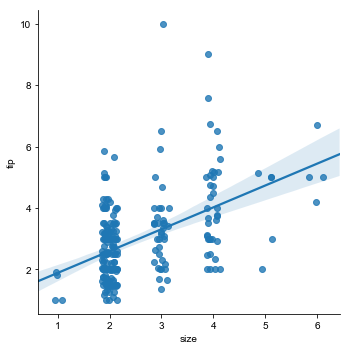

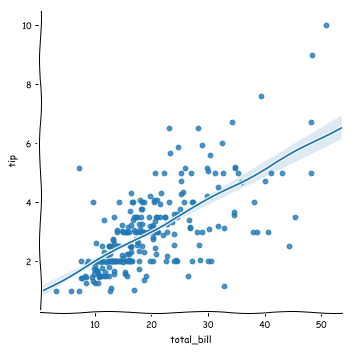

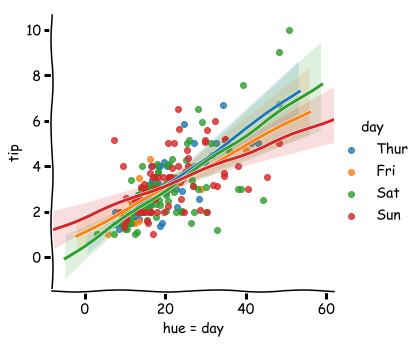

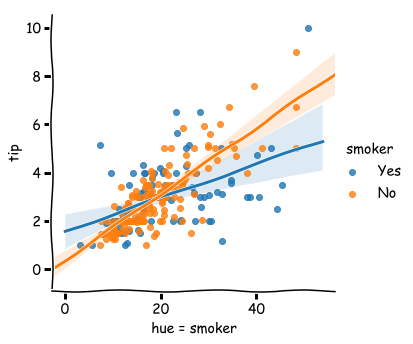

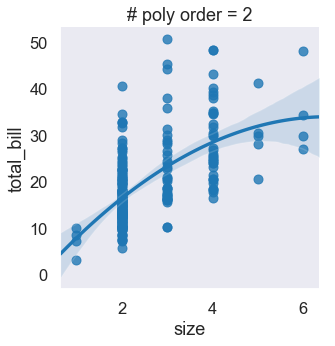

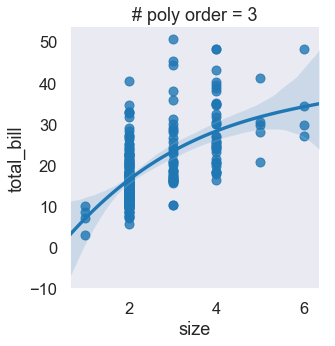

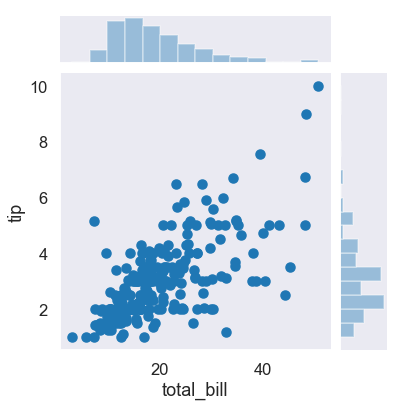

In [18]:
sns.lmplot('size', 'tip', tips, x_jitter=.15)

# seaborn还可以做出xkcd风格的图片
with plt.xkcd():
    sns.color_palette('husl', 8)
    sns.set_context('paper')
    sns.lmplot(x='total_bill', y='tip', data=tips, ci=65)
    
with plt.xkcd():
    sns.lmplot('total_bill', 'tip', data=tips, hue='day')
    plt.xlabel('hue = day')

with plt.xkcd():
    sns.lmplot('total_bill', 'tip', data=tips, hue='smoker')
    plt.xlabel('hue = smoker')

sns.set_style('dark')
sns.set_context('talk')
sns.lmplot('size', 'total_bill', tips, order=2)
plt.title('# poly order = 2')
plt.savefig('picture7')
plt.figure()
sns.lmplot('size', 'total_bill', tips, order=3)
plt.title('# poly order = 3')
plt.show()


sns.jointplot("total_bill", "tip", tips)

### lambda函数的应用

In [19]:
square = lambda x:x*x
print(IS_t_test.apply(square))

   group  data
0      1  1156
1      1  1369
2      1   784
3      1  1296
4      1   900
5      4  1849
6      4  2025
7      4  2209
8      4  2401
9      4  1521


### 其它

(一)调用R

让Python直接调用R的函数，下载安装rpy2模块即可

具体步骤：http://www.geome.cn/posts/python-%E9%80%9A%E8%BF%87rpy2%E8%B0%83%E7%94%A8-r%E8%AF%AD%E8%A8%80/

前提：电脑上安装了R

参考资料：
https://www.cnblogs.com/zzhzhao/p/5269217.html

https://www.cnblogs.com/zhizhan/p/5546599.html